In [1]:
import numpy as np
from numpy import sin, cos, pi
from scipy.fftpack import fft, fftfreq, ifft
import matplotlib.pyplot as plt


#**Generate Signal**

**1Hz, 10Hz & Random**

In [2]:
def generate_signal(tm, noise_flag=True):
    F1=1
    F2=10
    x=(2*sin(2*pi*F1*tm)) + (4*sin(2*pi*F2*tm))
    
    if (noise_flag):
        x+=(3*np.random.randn(tm.size)) 
        print('Noise added')
    return x

#**Select Parameters**

In [3]:
Fs=40
delF=0.0780
# delF=0.001
N=int(Fs/delF)
Tw=N/Fs

t=np.linspace(0,Tw,num=N)
signal=generate_signal(t)

print('Signal generated of duration {} sec'.format(Tw))

Noise added
Signal generated of duration 12.8 sec


#**Compute Spectrum**

In [4]:
spectrum=fft(signal)
F=fftfreq(N,1/Fs)
Fpositive=np.where(F>=0)
print(F.shape)
print(type(Fpositive))
print(spectrum.shape)
print(Fpositive)

(512,)
<class 'tuple'>
(512,)
(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 1

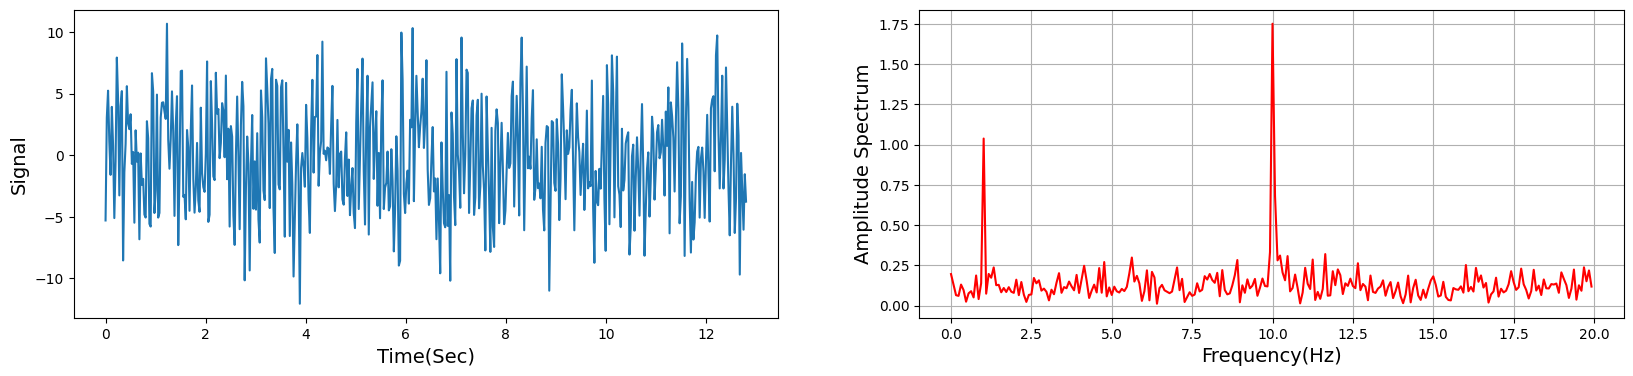

In [5]:
#@title Plot Signal & Spectrum
plt.figure(figsize=(20,4))

plt.subplot(1,2,1)
plt.plot(t,signal)
plt.xlabel('Time(Sec)',fontsize=14)
plt.ylabel('Signal',fontsize=14)

plt.subplot(1,2,2)
plt.plot(F[Fpositive],np.absolute(spectrum[Fpositive])/N,color='r')
plt.xlabel('Frequency(Hz)',fontsize=14)
plt.ylabel('Amplitude Spectrum',fontsize=14)
plt.grid()

#**Frequency Domian Filtering**

In [6]:
freq_thr=2
spectrum_filter= spectrum*(np.absolute(F)<freq_thr)
signal_filter=ifft(spectrum_filter)

spectrum_output=fft(signal_filter)

Text(0, 0.5, 'Spectrum')

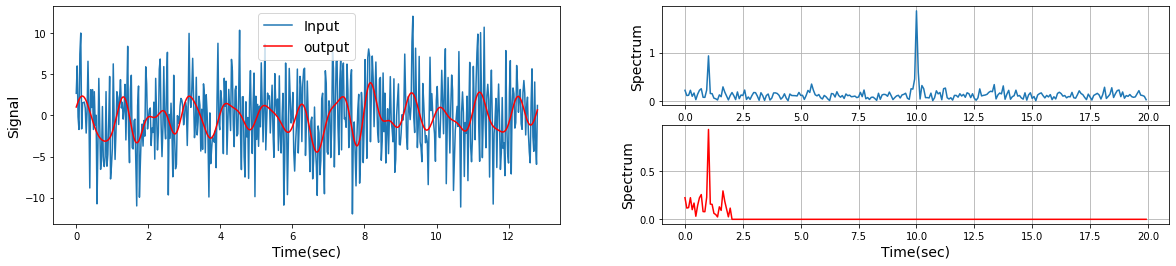

In [7]:
#@title Plot Filter Data & Spectrum
fig=plt.figure(figsize=(20,4))
gs=fig.add_gridspec(2,2)

ax1=fig.add_subplot(gs[:,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[1,1])


ax1.plot(t,signal,label='Input')
ax1.plot(t,signal_filter.real,color='r',label='output')
ax1.legend(fontsize=14)
ax1.set_xlabel('Time(sec)',fontsize=14)
ax1.set_ylabel('Signal',fontsize=14)

ax2.plot(F[Fpositive],np.absolute(spectrum[Fpositive])/N,label='Input')
ax2.grid()
ax1.legend(fontsize=14)
ax2.set_xlabel('Time(sec)',fontsize=14)
ax2.set_ylabel('Spectrum',fontsize=14)


ax3.plot(F[Fpositive],np.absolute(spectrum_output[Fpositive])/N,color='r',label='Output')
ax3.grid()
ax1.legend(fontsize=14)
ax3.set_xlabel('Time(sec)',fontsize=14)
ax3.set_ylabel('Spectrum',fontsize=14)
